<a href="https://colab.research.google.com/github/MacsEli/DocumentosDeClase/blob/main/Unsupervised_Learning_Clase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importando librerias
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [ ]:
#MOntar el drive en colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Leer el CSV de censo
census = pd.read_csv('/content/drive/MyDrive/Databases/Week 18 - USL/acs2015_county_data.csv')
census.head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,1.0,0.0,40725,51281.0,2391.0,24974,1080,12.9,18.6,33.2,17.0,24.2,8.6,17.1,87.5,8.8,0.1,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,0.7,0.0,147695,50254.0,1263.0,27317,711,13.4,19.2,33.1,17.7,27.1,10.8,11.2,84.7,8.8,0.1,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,0.4,0.0,20714,32964.0,2973.0,16824,798,26.7,45.3,26.8,16.1,23.1,10.8,23.1,83.8,10.9,0.4,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,0.1,0.0,17495,38678.0,3995.0,18431,1618,16.8,27.9,21.5,17.9,17.8,19.0,23.7,83.2,13.5,0.5,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,0.1,0.0,42345,45813.0,3141.0,20532,708,16.7,27.2,28.5,14.1,23.9,13.5,19.9,84.9,11.2,0.4,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7


In [ ]:
#Revisamos nulos
census.isnull().sum(axis=0)

In [ ]:
census = census.dropna()

In [ ]:
#tenemos un row por cada COunty
#Si KMeans o DBSCAN a partir de sus features, puede crear clusters o grupos
#y ver sus relacions
cols = [c for c in census.columns.values if c not in ['CensusId','State','County']]

In [ ]:
cols

['TotalPop',
 'Men',
 'Women',
 'Hispanic',
 'White',
 'Black',
 'Native',
 'Asian',
 'Pacific',
 'Citizen',
 'Income',
 'IncomeErr',
 'IncomePerCap',
 'IncomePerCapErr',
 'Poverty',
 'ChildPoverty',
 'Professional',
 'Service',
 'Office',
 'Construction',
 'Production',
 'Drive',
 'Carpool',
 'Transit',
 'Walk',
 'OtherTransp',
 'WorkAtHome',
 'MeanCommute',
 'Employed',
 'PrivateWork',
 'PublicWork',
 'SelfEmployed',
 'FamilyWork',
 'Unemployment']

#KMEans
K-Mean es una de las técnicas de agrupación en clústeres de aprendizaje automático no supervisado más utilizadas. 

Es una técnica de agrupación basada en centroides que necesita que nosotros decidamos el número de agrupaciones (centroides). 

El objetivo es dividir N observaciones en K grupos repetidamente hasta que no se puedan formar más grupos


Ventajas
1.   Facil de Implementar
2.   Bueno para trabajar con Datasets grandes

Desventajas

1.   No funciona bien con Outliers, tienden a jalar el centro
2.   Lento entre más dimensiones existan


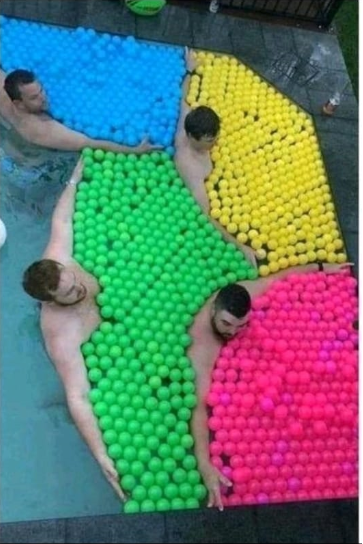

Ejemplos de KMeans:
* Segmentación por comportamiento: Relacionar usuarios de nuestro e-commerce según sus cctas.
* Categorizar nuestro inventario: Crear los grupo de categoría
* Detección de anomalías: Detectar patrones anomalos en neustro dataset.

In [ ]:
#Importar KMEans
from sklearn.cluster import KMeans

Es elegir correctamten los clusters que va a crear KMeans
Vamos a usar algo que se llama **Elbow Method**


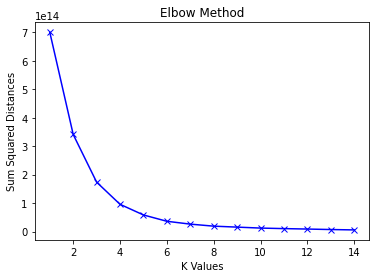

In [ ]:
#Crear primero un rango de valores de cluster
K = range(1,15)
sum_squared_distances = []
for k in K:
  model = KMeans(n_clusters=k).fit(census[cols])
  sum_squared_distances.append(model.inertia_)
plt.plot(K, sum_squared_distances, "bx-")
plt.xlabel("K Values")
plt.ylabel("Sum Squared Distances")
plt.title("Elbow Method")
plt.show()

In [ ]:
#Identificamos 4 clusters
kmeans = KMeans(n_clusters=4)
census_clusters = kmeans.fit(census[cols])


In [ ]:
#Clusters
len(census_clusters.cluster_centers_)

4

In [ ]:
len(cols)

34

In [ ]:
census_clusters.cluster_centers_

array([[4.86137678e+04, 2.40621967e+04, 2.45515711e+04, 1.05567434e+01,
        7.64794408e+01, 8.35263158e+00, 1.80161184e+00, 9.32302632e-01,
        6.60197368e-02, 3.59949480e+04, 4.52585901e+04, 2.96736349e+03,
        2.35332332e+04, 1.41598651e+03, 1.76663816e+01, 2.44105263e+01,
        3.05263158e+01, 1.83702632e+01, 2.20742434e+01, 1.29949671e+01,
        1.60345066e+01, 7.94196711e+01, 1.03449342e+01, 6.61085526e-01,
        3.34588816e+00, 1.59351974e+00, 4.63578947e+00, 2.30830263e+01,
        2.15065523e+04, 7.38485197e+01, 1.77832895e+01, 8.07098684e+00,
        2.97006579e-01, 8.08003289e+00],
       [2.59497053e+06, 1.27467168e+06, 1.32029884e+06, 3.28736842e+01,
        3.98684211e+01, 1.44368421e+01, 3.31578947e-01, 9.75789474e+00,
        1.89473684e-01, 1.65020984e+06, 5.85898947e+04, 4.97473684e+02,
        3.08353158e+04, 2.48105263e+02, 1.68368421e+01, 2.35842105e+01,
        3.71842105e+01, 1.95105263e+01, 2.45473684e+01, 8.02631579e+00,
        1.07368421e+01,

In [ ]:
#Clusterizar cada uno de nuestros datos.
preds = census_clusters.fit_predict(census[cols])

In [ ]:
census['cluster']=preds


In [ ]:
census.cluster.unique()

array([0, 3, 1, 2], dtype=int32)

In [ ]:
census[census.cluster==2]

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,cluster
204,6037,California,Los Angeles,10038388,4945351,5093037,48.2,26.9,8.0,0.2,14.0,0.2,6046749,56196.0,270.0,28337,113,18.2,25.8,35.7,19.1,24.6,7.8,12.8,73.0,9.9,6.8,2.8,2.3,5.1,30.0,4635465,79.0,11.5,9.4,0.2,10.0,2


In [ ]:
#VEr por estado cuales son del cluster 1
census[census.cluster==1].State.value_counts()

California    5
Texas         4
New York      3
Florida       2
Michigan      1
Arizona       1
Nevada        1
Washington    1
Illinois      1
Name: State, dtype: int64

In [ ]:
#Media de income por cluster
census.groupby(['cluster']).Income.mean()

cluster
0    45258.590132
1    58589.894737
2    56196.000000
3    61204.303797
Name: Income, dtype: float64

In [ ]:
census.cluster.value_counts()

0    3040
3     158
1      19
2       1
Name: cluster, dtype: int64

##Ejemplo Visual

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


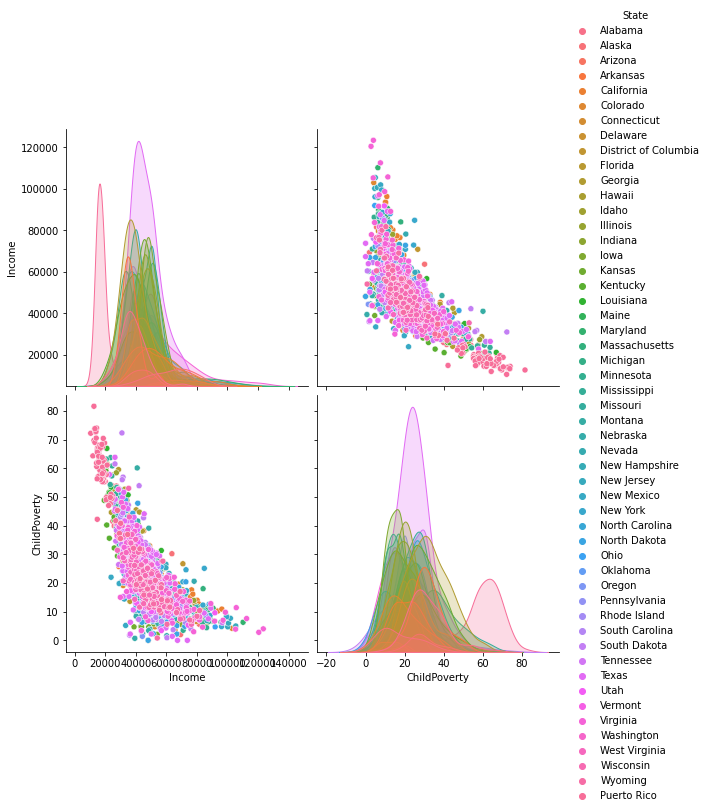

In [ ]:
#trabajar con 2 variables
#Elegí Income y ChildPoverty
sns.pairplot(census, hue='State', size=4, vars=['Income','ChildPoverty'],kind='scatter')

In [ ]:
#seleccionar los top 4 de estados por condados
print(census.groupby('State').size().nlargest(4))
cols= ['Texas','Georgia','Virginia','Kentucky']
census_new= census[census.State.isin(cols)]

State
Texas       253
Georgia     159
Virginia    133
Kentucky    120
dtype: int64


In [ ]:
#Escalar nuestras variables de datasets
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
census_new['IncomeSS'] = scale.fit_transform(census_new.Income.values.reshape(-1,1))
census_new['ChildPovertySS'] = scale.fit_transform(census_new.ChildPoverty.values.reshape(-1,1))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


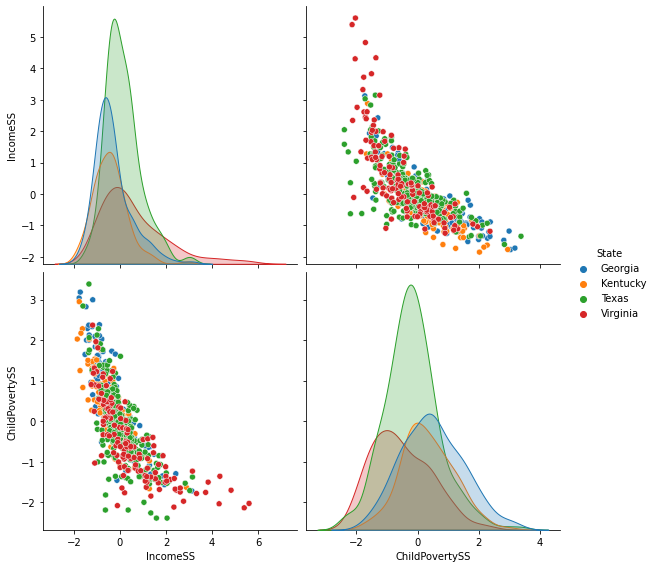

In [ ]:
sns.pairplot(census_new, hue='State', size=4, vars=['IncomeSS','ChildPovertySS'],kind='scatter')

In [ ]:
#Se transformar para mayor eficiencia
X = np.array(census_new[['IncomeSS','ChildPovertySS']])

In [ ]:
kmeans_2 = kmeans.fit(X)

In [ ]:
kmeans_2.cluster_centers_

array([[ 0.53680706, -0.79023765],
       [-0.96986149,  1.47947807],
       [-0.35102379,  0.12521348],
       [ 2.41687297, -1.52866131]])

In [ ]:
#CLUSTERS
labels = kmeans_2.predict(X)

#guadar los centros
center = kmeans_2.cluster_centers_
#generar colores
colors = ['yellow','red','blue','green']
asignar = []
for row in labels:
  asignar.append(colors[row])

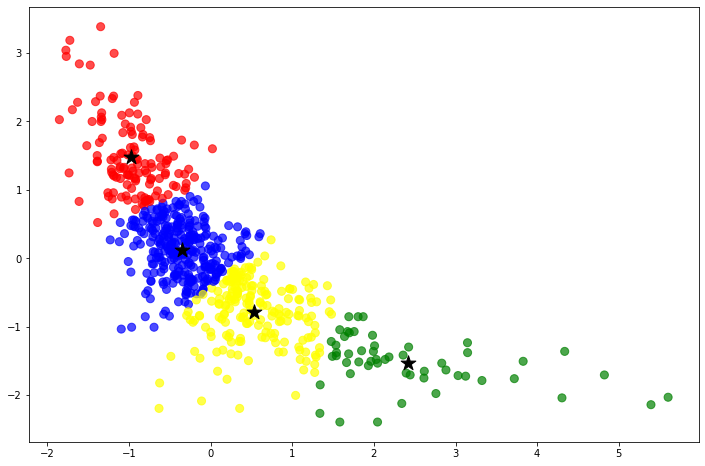

In [ ]:
plt.figure(figsize=(12,8))
#Separamos nuestros features
feature_1 = X[:,0]
feature_2 = X[:,1]
#generar scatterplot
plt.scatter(feature_1,feature_2,c=asignar,s=65,alpha=.7)
#mostrar nuestro centroide del cluster
plt.scatter(center[:,0],center[:,1],c='black',marker='*',s=240)


#DBSCAN
Density-based spatial clustering of applications with noise \\

DBSCAN hace esto midiendo la distancia entre cada punto y, si hay suficientes puntos lo suficientemente cerca, DBSCAN lo clasificará como un nuevo grupo.

Otros algoritmos de agrupación en clústeres como KMeans requieren que el usuario sepa cuántos clústeres existen en los datos.
En lugar de requerir cuántos clústeres se deben encontrar, DBSCAN requiere que el usuario ingrese la distancia máxima entre cada punto de datos que se puede considerar parte de un clúster y cuántos puntos de datos se necesitan para formar un clúster.

Descubre clusters de cualquier forma.
Muy sensible a los parametrs

DBSCAN no tiene centros.

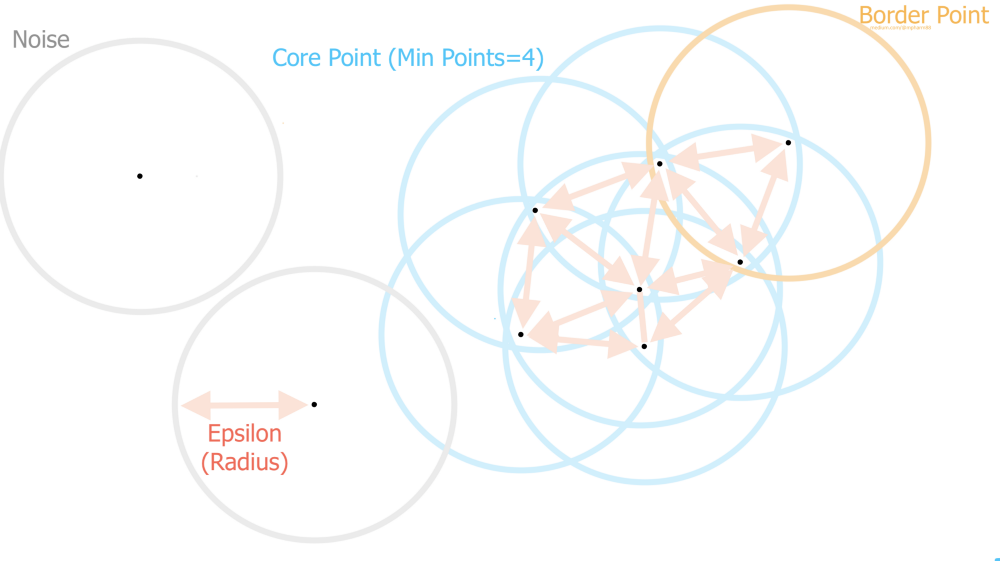

* Ruido (Noise): este es un punto que no tiene suficientes vecinos dentro de épsilon para ser parte de un clúster (incluido él mismo).
* Puntos de frontera (Border Points): este es un punto que tiene vecinos dentro de épsilon pero no suficientes vecinos para ser un punto central. Estos puntos forman el borde del grupo.
* Punto central (Core Points): puntos que tienen los puntos mínimos requeridos dentro de epsilon (incluido él mismo). Estos puntos junto con los puntos fronterizos formarán un grupo.

In [ ]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

In [ ]:
X

array([[-0.577306  , -0.11166692],
       [-1.02147312,  1.07465794],
       [-0.57537235, -0.38334437],
       ...,
       [ 0.03200935,  0.06039546],
       [ 0.24657315, -0.55540675],
       [ 0.01195666, -0.62785407]])

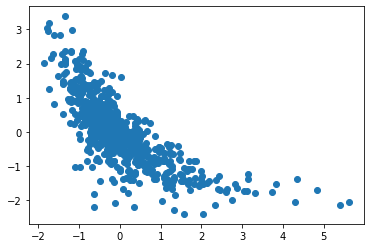

In [ ]:
plt.scatter(X[:,0],X[:,1])

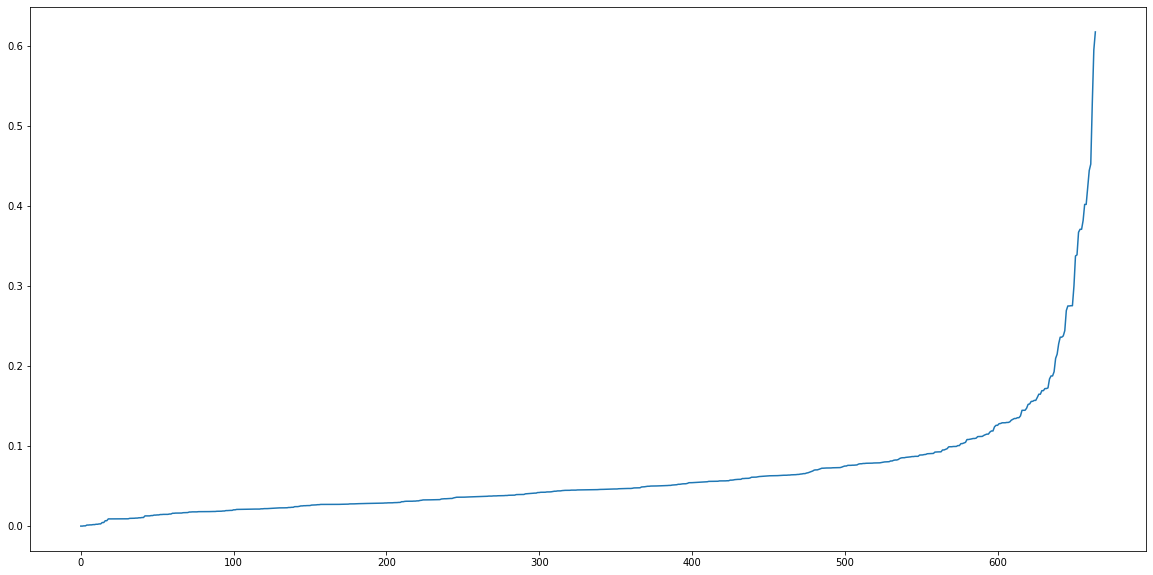

In [ ]:
#Identificar nuestra disntacia optima
nearest_neighbors = NearestNeighbors(n_neighbors=5)
nearest_neighbors.fit(X)
distances, indices = nearest_neighbors.kneighbors(X)
distances = np.sort(distances, axis=0)[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.show()

In [ ]:
#DBSCAN necesita epsilon validado por NearestNeighbors = .15
#necesita minPoints-->Min_samples
#Si nuestras dimensiones son =2 entonces min_sample=2*dim
#Si llega a crecer de dimensiones  Vamos a usar como min_samples el totald de dimensiones
#que tengamos
#PorDefault tiene un valor de 4 para los de 2 dimensiones
m = DBSCAN(eps=.15, min_samples=4)
m.fit(X)

DBSCAN(algorithm='auto', eps=0.15, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=4, n_jobs=None, p=None)

In [ ]:
#Asignar nuestros labels/clusters
labels = m.labels_

In [ ]:
#El valor -1 será el clúster de los outliers
labels

array([ 0,  0,  0, -1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  3,  0,  1,
        0, -1,  0,  1,  0,  0,  0,  0, -1,  0,  2,  0, -1,  0, -1, -1,  0,
        0,  6,  0,  3,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0, -1,  0, -1, -1,  0,  0,  0,  1, -1,  3,  0,
        0,  4,  0,  0,  0,  0,  3,  0,  0,  0,  0,  0,  4, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  5,
        0,  0,  0,  0,  0,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0, -1,  0,  0,  4, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  7,  0,  0,  0,
        0, -1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  4,  0,
        0,  0, -1, -1,  0

In [ ]:
#Empezar a enmascarar nuestros datos
labels_mask_general = np.zeros_like(labels,dtype=bool)

In [ ]:
#Colocar outliers como verdadero
labels_mask_general[m.core_sample_indices_] = True

In [ ]:
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)
n_noise

102

In [ ]:
n_clusters

8

In [ ]:
#Empezar a graficar
unique_labels = set(labels)
colors = plt.cm.rainbow(np.linspace(0,1,len(unique_labels)))

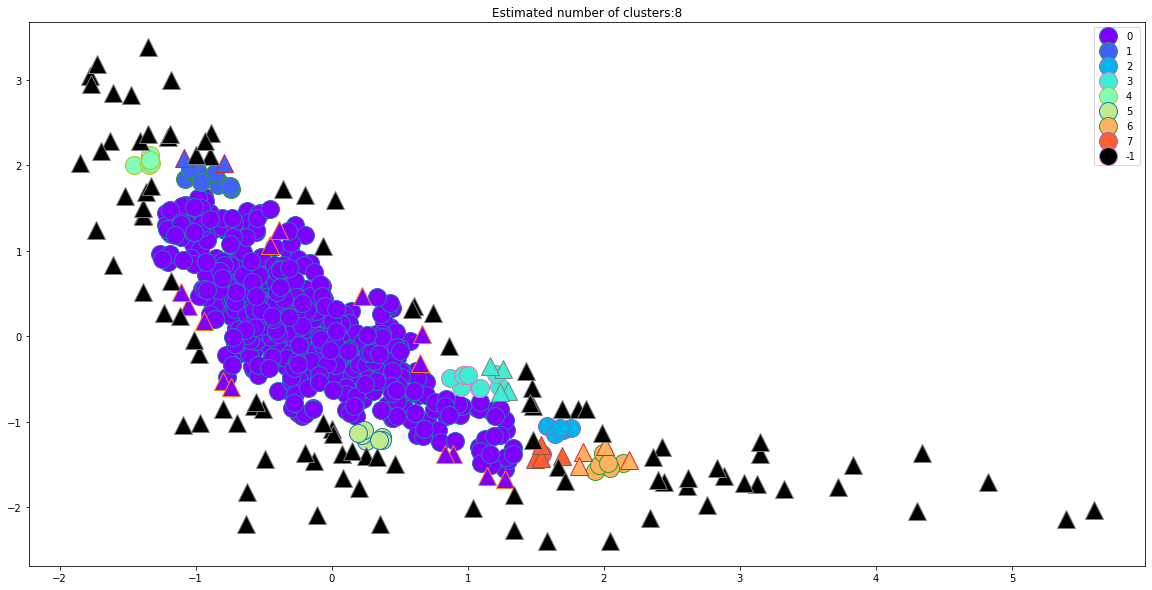

In [ ]:
plt.figure(figsize=(20,10))
#iterar entre cada label y colo
for k, col in zip(unique_labels, colors):
  if k ==-1:
    col='k'
#True false donde la etiqueta corresponda a la iteración
  clase = (labels == k)
  #traer el valor de la posicion de Income y ChildPoverty donde clase y labels_mask coincidan
  xy = X[clase & labels_mask_general]
  plt.plot(xy[:,0],xy[:,1],"o",markerfacecolor=col,markersize=18,label=k,alpha=1)
  #los valores frontera
  xy = X[clase & ~labels_mask_general]
  plt.plot(xy[:,0],xy[:,1],"^",markerfacecolor=col,markersize=18,alpha=1)

plt.title("Estimated number of clusters:%d"% n_clusters)
plt.legend()
plt.show()
